# Import Library

In [2]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00


In [3]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Load Dataset

In [4]:
data = pd.read_csv("/content/timnas_.csv")

In [5]:
data

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1912906567235805691,Thu Apr 17 16:30:40 +0000 2025,0,Buat aku yang baca puluhan/ratusan berita seti...,1912906567235805691,NaN,NaN,in,Jakarta Capital Region,0,0,0,https://x.com/ridiria/status/1912906567235805691,521103021,ridiria
1,1912802599213875628,Thu Apr 17 16:28:25 +0000 2025,0,@Prikiti3uw @YKurniawandy @licesyasr Bagus kok...,1912905999842943316,NaN,Prikiti3uw,in,NaN,0,0,0,https://x.com/hiiccharuchu/status/191290599984...,2709213638,hiiccharuchu
2,1912873727689412729,Thu Apr 17 16:25:23 +0000 2025,0,@annisaHP @theaseanball Mungkin masalah budget...,1912905236647387513,NaN,annisaHP,in,Tangerang Selatan,0,0,0,https://x.com/Aldera_AM/status/191290523664738...,284925300,Aldera_AM
3,1912904745041404092,Thu Apr 17 16:25:02 +0000 2025,0,5. Peran Kunci di Timnas Belgia Sejak debut pa...,1912905151398158366,NaN,arsyilasadiya,in,"Jakarta Pusat, DKI Jakarta",0,1,0,https://x.com/arsyilasadiya/status/19129051513...,2329612471,arsyilasadiya
4,1912904310838755830,Thu Apr 17 16:23:23 +0000 2025,0,Belom lagi design jersey yang drastis beda. Ni...,1912904734878429281,NaN,_raihandsome,in,NaN,0,0,0,https://x.com/_raihandsome/status/191290473487...,611431789,_raihandsome
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3133,1911742780269101429,Mon Apr 14 11:26:11 +0000 2025,0,Agak shock liat mayoritas pemain pemain timnas...,1911742780269101429,NaN,NaN,in,NaN,0,0,0,https://x.com/arienzo_/status/1911742780269101429,769812343,arienzo_
3134,1911375602306941314,Mon Apr 14 11:24:33 +0000 2025,0,@Atlitrebahan3 @SiaranBolaLive Loh katanya akh...,1911742367625085096,NaN,Atlitrebahan3,in,"DKI Jakarta, Indonesia",0,0,0,https://x.com/YNWAaja/status/1911742367625085096,1840802861942534144,YNWAaja
3135,1911742162058027467,Mon Apr 14 11:23:44 +0000 2025,0,yang mau nonton walid atau timnas aku jual app...,1911742162058027467,NaN,NaN,in,mt after dm.,0,0,0,https://x.com/sgirip/status/1911742162058027467,970036724,sgirip
3136,1911742111315316840,Mon Apr 14 11:23:32 +0000 2025,2,4 September 2025 Timnas Spanyol akan bertandan...,1911742111315316840,NaN,NaN,in,NaN,0,0,1,https://x.com/rezakaisar3/status/1911742111315...,134745162,rezakaisar3


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3138 entries, 0 to 3137
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      3138 non-null   int64 
 1   created_at               3138 non-null   object
 2   favorite_count           3138 non-null   int64 
 3   full_text                3138 non-null   object
 4   id_str                   3138 non-null   int64 
 5   image_url                476 non-null    object
 6   in_reply_to_screen_name  1444 non-null   object
 7   lang                     3138 non-null   object
 8   location                 1733 non-null   object
 9   quote_count              3138 non-null   int64 
 10  reply_count              3138 non-null   int64 
 11  retweet_count            3138 non-null   int64 
 12  tweet_url                3138 non-null   object
 13  user_id_str              3138 non-null   int64 
 14  username                 3138 non-null  

In [7]:
# Took only the text column
clean_data = data[['full_text']]

In [8]:
clean_data.head()

,full_text
0,Buat aku yang baca puluhan/ratusan berita seti...
1,@Prikiti3uw @YKurniawandy @licesyasr Bagus kok...
2,@annisaHP @theaseanball Mungkin masalah budget...
3,5. Peran Kunci di Timnas Belgia Sejak debut pa...
4,Belom lagi design jersey yang drastis beda. Ni...


In [9]:
clean_data.tail()

,full_text
3133,Agak shock liat mayoritas pemain pemain timnas...
3134,@Atlitrebahan3 @SiaranBolaLive Loh katanya akh...
3135,yang mau nonton walid atau timnas aku jual app...
3136,4 September 2025 Timnas Spanyol akan bertandan...
3137,Timnas Indonesia U-17 bukan cuma numpang lewat...


In [10]:
# Check for missing values
clean_data.isnull().sum()

,0
full_text,0


In [11]:
# Check for duplicates
clean_data.duplicated().sum()

np.int64(16)

In [12]:
# Drop duplicates
clean_data = clean_data.drop_duplicates()

In [13]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3122 entries, 0 to 3137
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  3122 non-null   object
dtypes: object(1)
memory usage: 48.8+ KB


In [14]:
clean_data.shape

(3122, 1)

# Data Preprocessing

In [15]:
!pip install emoji
import re
import string
import emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.8 MB/s eta 0:00:00


In [16]:

# Menghapus emoji dari teks
def removeEmoji(text):
    return emoji.replace_emoji(text, replace="")

# Menormalkan karakter berulang (contoh: "hebaaaattt" -> "hebat")
def normalizeRepeatedCharacters(text):
    return re.sub(r'(.)\1{2,}', r'\1', text)

# Membersihkan teks dari simbol, tag, angka, dan karakter tak penting
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)         # Hapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text)         # Hapus hashtag
    text = re.sub(r'RT[\s]', '', text)                # Hapus 'RT' (retweet)
    text = re.sub(r"http\S+", '', text)               # Hapus URL
    text = re.sub(r'[0-9]+', '', text)                # Hapus angka
    text = re.sub(r'[^\w\s]', '', text)               # Hapus karakter aneh
    text = text.replace('\n', ' ')                    # Hapus newline
    text = text.translate(str.maketrans('', '', string.punctuation))  # Hapus tanda baca
    text = text.strip(' ')                            # Hapus spasi depan/belakang
    return text

# Mengubah semua huruf menjadi huruf kecil
def casefoldingText(text):
    return text.lower()

# Tokenisasi (memecah teks menjadi kata-kata)
def tokenizingText(text):
    return word_tokenize(text)

# Menghapus stopword dalam Bahasa Indonesia dan Inggris + kata tidak penting lainnya
def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update([
        'iya','yaa','gak','nya','na','sih','ku','di','ga','ya','gaa','loh','lho',
        'kah','woi','woii','woy','nih','dong','deh','wkwk','haha'
    ])
    filtered = [word for word in text if word not in listStopwords]
    return filtered

# Melakukan stemming menggunakan Sastrawi (mengubah ke bentuk dasar)
def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Menggabungkan kembali list kata menjadi satu kalimat
def toSentence(list_words):
    return ' '.join(list_words)

In [17]:
# === Tambah kamus slangwords ===
slangwords = {
    "@": "mungkin",
    "yg": "yang",
    "aja": "saja",
    "ga": "tidak",
    "gak": "tidak",
    "ya": "iya",
    "udah": "sudah",
    "kalo": "kalau",
    "sih": "",  # bisa dikosongkan karena hanya penekanan
    "cuma": "hanya",
    "banget": "sangat",
    "aku": "saya",
    "tapi": "tetapi",
    "mau": "ingin",
    "nonton": "menonton",
    "buat": "untuk",
    "nggak": "tidak",
    "ngga": "tidak",
    "ajaib": "luarbiasa"
}

# === Fungsi untuk memperbaiki slangwords ===
def fix_slangwords(text):
    words = text.split()
    fixed_words = []
    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)
    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [18]:
clean_data

,full_text
0,Buat aku yang baca puluhan/ratusan berita seti...
1,@Prikiti3uw @YKurniawandy @licesyasr Bagus kok...
2,@annisaHP @theaseanball Mungkin masalah budget...
3,5. Peran Kunci di Timnas Belgia Sejak debut pa...
4,Belom lagi design jersey yang drastis beda. Ni...
...,...
3133,Agak shock liat mayoritas pemain pemain timnas...
3134,@Atlitrebahan3 @SiaranBolaLive Loh katanya akh...
3135,yang mau nonton walid atau timnas aku jual app...
3136,4 September 2025 Timnas Spanyol akan bertandan...


In [19]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [20]:
# Membersihkan teks dan menyimpannya di kolom text_clean
clean_data['text_clean'] = clean_data['full_text'].apply(removeEmoji)
clean_data['text_clean'] = clean_data['text_clean'].apply(normalizeRepeatedCharacters)
clean_data['text_clean'] = clean_data['text_clean'].apply(cleaningText)

# Mengubah seluruh huruf menjadi huruf kecil dan menyimpannya di kolom text_casefoldingText
clean_data['text_casefoldingText'] = clean_data['text_clean'].apply(casefoldingText)

# Mengubah kata-kata tidak baku (slang) menjadi kata baku, disimpan di kolom text_slangwords
clean_data['text_slangwords'] = clean_data['text_casefoldingText'].apply(fix_slangwords)

# Memisahkan teks menjadi token (kata-kata) dan menyimpannya di kolom text_tokenizingText
clean_data['text_tokenizingText'] = clean_data['text_slangwords'].apply(tokenizingText)

# Menghapus stopwords (kata umum yang kurang bermakna) dan menyimpannya di kolom text_stopword
clean_data['text_stopword'] = clean_data['text_tokenizingText'].apply(filteringText)

# Menggabungkan kembali token menjadi kalimat akhir, disimpan di kolom text_final
clean_data['text_final'] = clean_data['text_stopword'].apply(toSentence)

In [21]:
clean_data

,full_text,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_final
0,Buat aku yang baca puluhan/ratusan berita seti...,Buat aku yang baca puluhanratusan berita setia...,buat aku yang baca puluhanratusan berita setia...,untuk saya yang baca puluhanratusan berita set...,"[untuk, saya, yang, baca, puluhanratusan, beri...","[baca, puluhanratusan, berita, emang, kerjaann...",baca puluhanratusan berita emang kerjaannya ti...
1,@Prikiti3uw @YKurniawandy @licesyasr Bagus kok...,Bagus kok Libero putri sekarang lebih bagus la...,bagus kok libero putri sekarang lebih bagus la...,bagus kok libero putri sekarang lebih bagus la...,"[bagus, kok, libero, putri, sekarang, lebih, b...","[bagus, libero, putri, bagus, cuman, kadang, p...",bagus libero putri bagus cuman kadang pas pema...
2,@annisaHP @theaseanball Mungkin masalah budget...,Mungkin masalah budget atau ridho emang mau li...,mungkin masalah budget atau ridho emang mau li...,mungkin masalah budget atau ridho emang ingin ...,"[mungkin, masalah, budget, atau, ridho, emang,...","[budget, ridho, emang, libur, bela, timnas]",budget ridho emang libur bela timnas
3,5. Peran Kunci di Timnas Belgia Sejak debut pa...,Peran Kunci di Timnas Belgia Sejak debut pada ...,peran kunci di timnas belgia sejak debut pada ...,peran kunci di timnas belgia sejak debut pada ...,"[peran, kunci, di, timnas, belgia, sejak, debu...","[peran, kunci, timnas, belgia, debut, de, bruy...",peran kunci timnas belgia debut de bruyne menc...
4,Belom lagi design jersey yang drastis beda. Ni...,Belom lagi design jersey yang drastis beda Nik...,belom lagi design jersey yang drastis beda nik...,belom lagi design jersey yang drastis beda nik...,"[belom, lagi, design, jersey, yang, drastis, b...","[belom, design, jersey, drastis, beda, nike, p...",belom design jersey drastis beda nike pake swo...
...,...,...,...,...,...,...,...
3133,Agak shock liat mayoritas pemain pemain timnas...,Agak shock liat mayoritas pemain pemain timnas...,agak shock liat mayoritas pemain pemain timnas...,agak shock liat mayoritas pemain pemain timnas...,"[agak, shock, liat, mayoritas, pemain, pemain,...","[shock, liat, mayoritas, pemain, pemain, timna...",shock liat mayoritas pemain pemain timnas kore...
3134,@Atlitrebahan3 @SiaranBolaLive Loh katanya akh...,Loh katanya akhir tahun timnas senior mau lawa...,loh katanya akhir tahun timnas senior mau lawa...,loh katanya akhir tahun timnas senior ingin la...,"[loh, katanya, akhir, tahun, timnas, senior, i...","[timnas, senior, lawan, klub, pemilik, klub, i...",timnas senior lawan klub pemilik klub indo amp...
3135,yang mau nonton walid atau timnas aku jual app...,yang mau nonton walid atau timnas aku jual app...,yang mau nonton walid atau timnas aku jual app...,yang ingin menonton walid atau timnas saya jua...,"[yang, ingin, menonton, walid, atau, timnas, s...","[menonton, walid, timnas, jual, app, prem, net...",menonton walid timnas jual app prem netflix vi...
3136,4 September 2025 Timnas Spanyol akan bertandan...,September Timnas Spanyol akan bertandang ke n...,september timnas spanyol akan bertandang ke n...,september timnas spanyol akan bertandang ke ne...,"[september, timnas, spanyol, akan, bertandang,...","[september, timnas, spanyol, bertandang, neger...",september timnas spanyol bertandang negeri kun...


# Labeling Data

In [22]:
import requests
import csv
from io import StringIO

# Loads positive lexicon data from GitHub
# Membaca Data Lexicon Positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")


In [23]:
# Function to determine sentiment polarity of tweets
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if score > 0.5:  # Positive threshold
        polarity = 'positive'
    elif score < -0.5:  # Negative threshold
        polarity = 'negative'
    else:  # Neutral threshold
        polarity = 'neutral'

    return score, polarity

In [24]:
results = clean_data['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_data['polarity_score'] = results[0]
clean_data['polarity'] = results[1]
print(clean_data['polarity'].value_counts())

polarity
negative    1789
positive     858
neutral      475
Name: count, dtype: int64


# Data Visualization

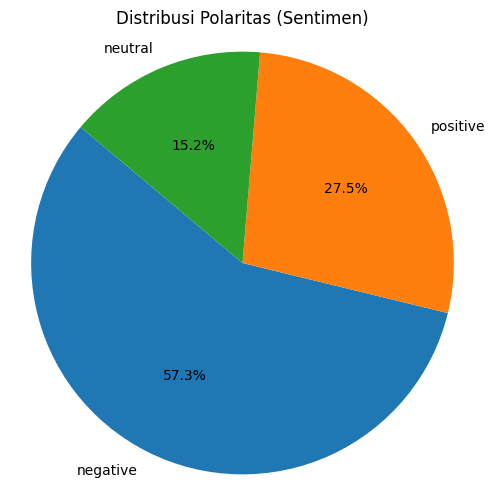

In [25]:
# Visualisasi Distribusi Polaritas (Sentimen)
polarity_counts = clean_data['polarity'].value_counts()   # Menghitung jumlah kemunculan masing-masing nilai pada kolom polarity (misalnya: positif, negatif, netral).

# Membuat Pie Chart
  # ukuran 6.6
plt.figure(figsize=(6, 6))
  #Membuat diagram lingkaran:
plt.pie(polarity_counts, labels=polarity_counts.index, autopct='%1.1f%%', startangle=140)

  # Menambahkan Judul dan Menampilkan Grafik
# Judul: Distribusi Polaritas (Sentimen)
plt.title('Distribusi Polaritas (Sentimen)')
plt.axis('equal')
plt.show()




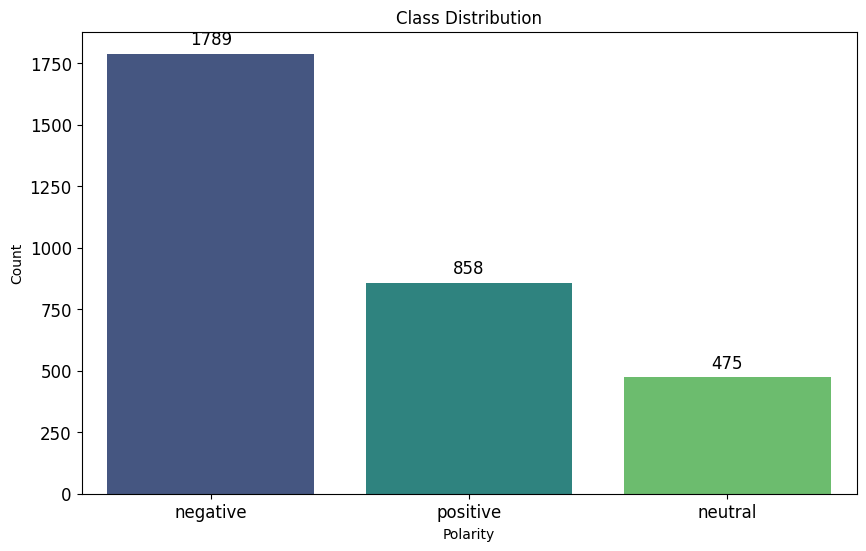

In [26]:
# Pengaturan Ukuran Gambar:
plt.figure(figsize=(10, 6))

# Membuat Count Plot:
class_dist_plot = sns.countplot(x='polarity', data=clean_data, hue='polarity', palette='viridis', legend=False)

# Menambahkan Anotasi pada Setiap Bar:
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center',
                            xytext=(0, 10),
                            textcoords='offset points',
                            fontsize=12)

# Menambahkan Judul dan Menampilkan Grafik:
# Mengatur Ukuran Font pada Ticks:

plt.title('Class Distribution')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

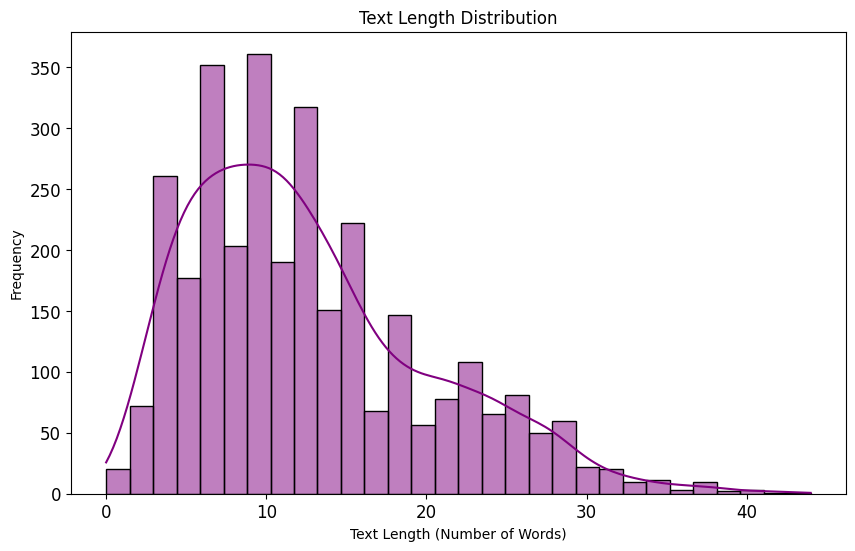

In [27]:
# Menambahkan Kolom text_length:
data['text_length'] = clean_data['text_final'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

# Membuat Plot Histogram:
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=30, kde=True, color='purple')

# Menambahkan Judul dan Label pada Sumbu:
plt.title('Text Length Distribution')
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Frequency')

# Mengatur Ukuran Font pada Ticks:
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Menampilkan Plot:
plt.show()

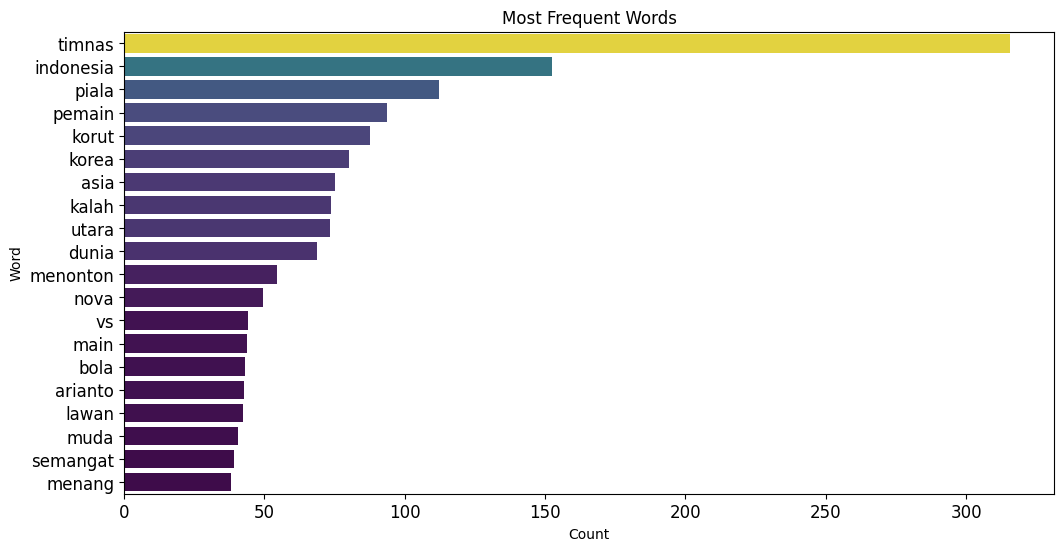

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Menggunakan TF-IDF untuk Menyaring Kata Penting
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(clean_data['text_final'].dropna())

# Mengubah Hasil TF-IDF menjadi DataFrame
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Menjumlahkan Frekuensi Kata Secara Keseluruhan
word_counts = tfidf_df.sum().reset_index()
word_counts.columns = ['word', 'count']

# Mengambil 20 Kata Teratas
most_frequent = word_counts.sort_values('count', ascending=False).head(20)

# Menampilkan Barplot (Grafik Batang)
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='word', data=most_frequent, hue='count', palette='viridis', legend=False)
plt.title('Most Frequent Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# Kesimpulan:
# Grafik ini memperlihatkan kata-kata yang paling sering muncul dalam kumpulan teks setelah dibersihkan dan diproses menggunakan TF-IDF. Ini sangat berguna untuk memahami topik atau tema utama dari data teks tersebut.



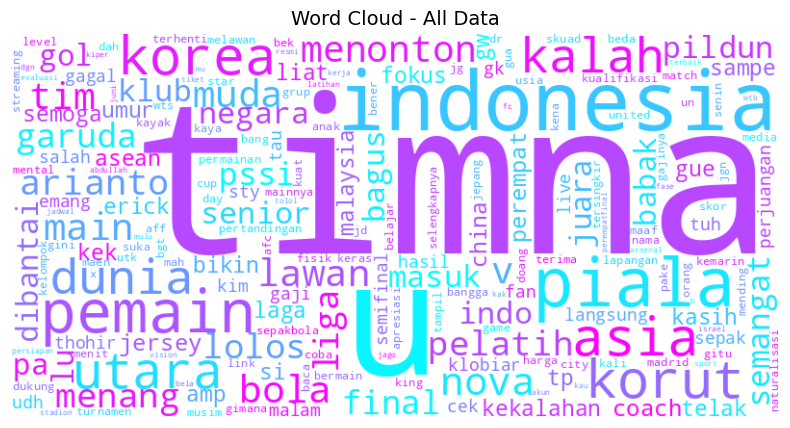

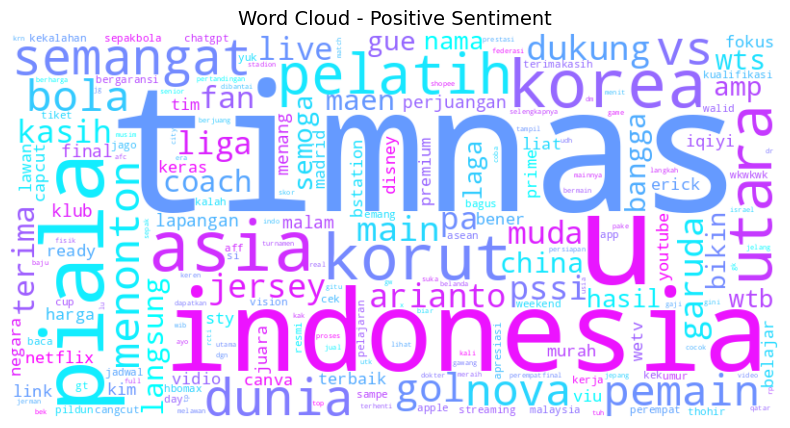

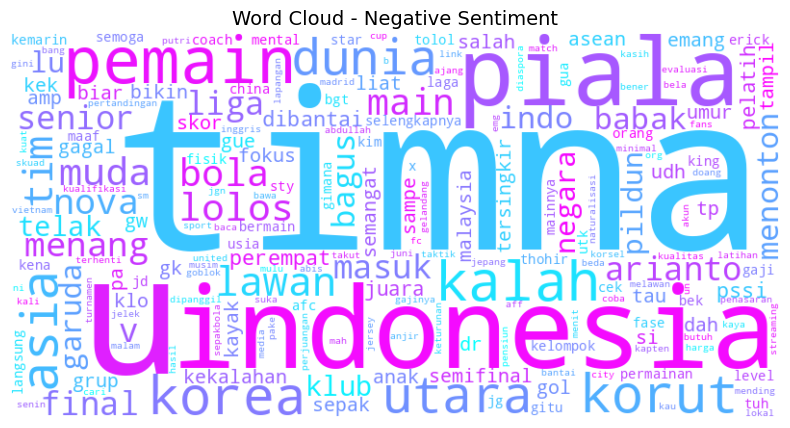

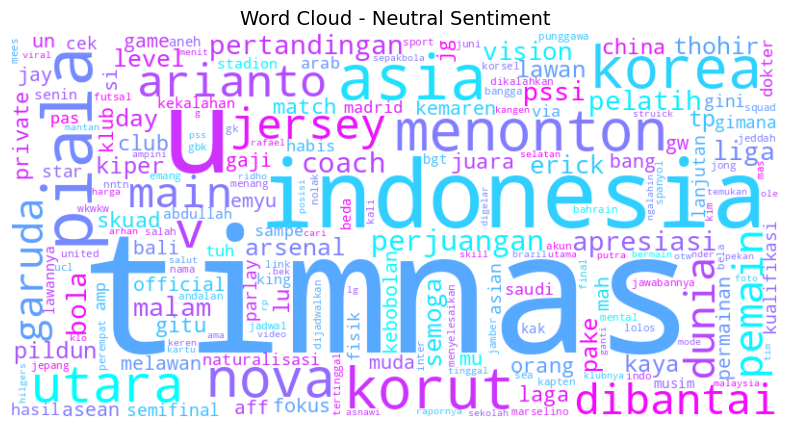

In [29]:
# Fungsi untuk Membuat Word Cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='cool',
        collocations=False
    ).generate(text)

# Menampilkan Word Cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=14)
    plt.show()

# Membuat Word Cloud untuk Semua Data
all_text = ' '.join(clean_data['text_final'].dropna())
generate_wordcloud(all_text, 'Word Cloud - All Data')

# Word Cloud untuk Sentimen Positif
positive_text = ' '.join(clean_data[clean_data['polarity'] == 'positive']['text_final'].dropna())
generate_wordcloud(positive_text, 'Word Cloud - Positive Sentiment')

# Word Cloud untuk Sentimen Negatif
negative_text = ' '.join(clean_data[clean_data['polarity'] == 'negative']['text_final'].dropna())
generate_wordcloud(negative_text, 'Word Cloud - Negative Sentiment')

# Word Cloud untuk Sentimen Netral
neutral_text = ' '.join(clean_data[clean_data['polarity'] == 'neutral']['text_final'].dropna())
generate_wordcloud(neutral_text, 'Word Cloud - Neutral Sentiment')


Visualisasi Word Cloud ini membantu untuk:

Melihat kata-kata yang sering muncul di seluruh dataset maupun berdasarkan sentimen tertentu (positif, negatif, netral).

Memahami topik atau tema utama yang dibahas dalam kumpulan data teks tersebut.

Menjadi alat eksplorasi awal yang cepat dan intuitif dalam analisis teks.

# Modeling

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, top_k_accuracy_score

In [31]:
clean_data.head(2)

,full_text,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_final,polarity_score,polarity
0,Buat aku yang baca puluhan/ratusan berita seti...,Buat aku yang baca puluhanratusan berita setia...,buat aku yang baca puluhanratusan berita setia...,untuk saya yang baca puluhanratusan berita set...,"[untuk, saya, yang, baca, puluhanratusan, beri...","[baca, puluhanratusan, berita, emang, kerjaann...",baca puluhanratusan berita emang kerjaannya ti...,-8,negative
1,@Prikiti3uw @YKurniawandy @licesyasr Bagus kok...,Bagus kok Libero putri sekarang lebih bagus la...,bagus kok libero putri sekarang lebih bagus la...,bagus kok libero putri sekarang lebih bagus la...,"[bagus, kok, libero, putri, sekarang, lebih, b...","[bagus, libero, putri, bagus, cuman, kadang, p...",bagus libero putri bagus cuman kadang pas pema...,-3,negative


# Model 1 - Logistic Regression

In [32]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_data['text_final']
y = clean_data['polarity']

In [33]:
tfidf_lr = TfidfVectorizer(
    max_features=5000,  # naikkan jumlah fitur
    min_df=2,           # turunkan agar menangkap kata lebih banyak
    max_df=0.9,
    ngram_range=(1,2),  # pakai unigram dan bigram
    stop_words='english'
)


In [34]:
# Assuming X is your original feature data and y is your original target variable

# 1. Apply TF-IDF vectorization to X
X_tfidf_lr = tfidf_lr.fit_transform(X)

# 2. Perform the train-test split
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X_tfidf_lr, y, test_size=0.3, random_state=42
)

# Convert to one hot encoding
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_train_lr = encoder.fit_transform(y_train_lr)
y_test_lr = encoder.transform(y_test_lr)


# 3. Now you can fit the model
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=200, random_state=42)
model_rf.fit(X_train_lr, y_train_lr)  # y_train_lr should be 1-dimensional

y_pred_test_rf = model_rf.predict(X_test_lr)
accuracy_test_rf = accuracy_score(y_test_lr, y_pred_test_rf)

print(f"Test Accuracy RF: {accuracy_test_rf * 100:.2f}%")

Test Accuracy RF: 61.90%


In [35]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf_lr, y)

# Split ulang data resampled
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


In [36]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import numpy as np # Make sure numpy is imported

params = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

# Instead of using argmax, directly use the original y_train_lr if it's a pandas Series
# or convert it to a numpy array if it's not
y_train_lr_1d = y_train_lr.to_numpy() if isinstance(y_train_lr, pd.Series) else np.array(y_train_lr)

grid = GridSearchCV(LogisticRegression(), param_grid=params, cv=5)
grid.fit(X_train_lr, y_train_lr_1d)  # Use the 1D target variable here

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Params: {'C': 10, 'max_iter': 100, 'solver': 'saga'}
Best Score: 0.8394573193189222


In [37]:
# Import dan Membuat Model
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(max_iter=200)

# Melatih Model
# Removed np.argmax as it's not needed for 1D target
logistic_regression.fit(X_train_lr.toarray(), y_train_lr)

# Memprediksi Sentimen
# Removed np.argmax from prediction as well
y_pred_train_lr = logistic_regression.predict(X_train_lr.toarray())
y_pred_test_lr = logistic_regression.predict(X_test_lr.toarray())

# Menghitung Akurasi
# Removed np.argmax from accuracy calculation
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train_lr)
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test_lr)

# Menampilkan Hasil Akurasi
print('Train Accuracy:', accuracy_train_lr)
print('Test Accuracy:', accuracy_test_lr)

Train Accuracy: 0.9222577209797657
Test Accuracy: 0.8206083178150217


Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.79      0.83       532
     neutral       0.75      0.92      0.82       526
    positive       0.87      0.76      0.81       553

    accuracy                           0.82      1611
   macro avg       0.83      0.82      0.82      1611
weighted avg       0.83      0.82      0.82      1611



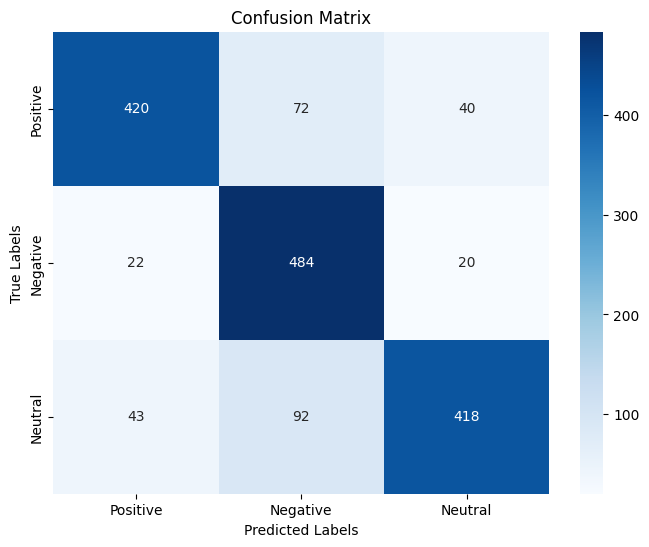

In [40]:
from sklearn.metrics import classification_report, confusion_matrix # Import classification_report and confusion_matrix
# Classification Report
print("Classification Report:")
print(classification_report(y_test_lr, y_pred_test_lr))

# Confusion Matrix
conf_matrix_test = confusion_matrix(y_test_lr, y_pred_test_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Kesimpulan:
Bagian ini membantu untuk mengetahui secara rinci bagaimana kinerja model dalam memprediksi sentimen.

Kamu bisa tahu model lebih bagus dalam mengenali sentimen tertentu (misalnya lebih akurat di positif daripada netral).

# Model 2 - LSTM

In [41]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [42]:
# Memisahkan Fitur dan Label
texts = clean_data['text_final']
labels = clean_data['polarity']

# Mengubah Label Menjadi Angka
label_mapping = {'positive': 0, 'negative': 1, 'neutral': 2}
labels = labels.map(label_mapping)

In [53]:
# 6. Tokenisasi dan Padding
texts = clean_data['text_final'].astype(str).values
# Apply the label mapping to the labels array
labels = clean_data['polarity'].map({'positive': 0, 'negative': 1, 'neutral': 2}).values

tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_length = 100
X = pad_sequences(sequences, maxlen=max_length)
y = to_categorical(labels, num_classes=3)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# 8. Build Model LSTM
lstm_model = Sequential([
    Embedding(input_dim=8000, output_dim=128),
    LSTM(128, return_sequences=True),
    Dropout(0.4),
    LSTM(64, return_sequences=True),
    Dropout(0.4),
    LSTM(32),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(3, activation='softmax')
])


In [86]:

lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [88]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.3, min_lr=1e-5)

In [89]:
# 11. Train Model
history = lstm_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 320ms/step - accuracy: 0.5603 - loss: 1.0152 - val_accuracy: 0.5560 - val_loss: 0.9361 - learning_rate: 0.0010
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 411ms/step - accuracy: 0.5721 - loss: 0.9204 - val_accuracy: 0.5840 - val_loss: 0.9093 - learning_rate: 0.0010
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 51s 577ms/step - accuracy: 0.6130 - loss: 0.8684 - val_accuracy: 0.6620 - val_loss: 0.7729 - learning_rate: 0.0010
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 311ms/step - accuracy: 0.7264 - loss: 0.6337 - val_accuracy: 0.5960 - val_loss: 0.8214 - learning_rate: 0.0010
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 293ms/step - accuracy: 0.7825 - loss: 0.4884 - val_accuracy: 0.6760 - val_loss: 0.8788 - learning_rate: 0.0010
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 310ms/step - accuracy: 0.8787 - loss: 0.3342 - val_accuracy: 0.6780 - val_loss: 1.0214 - learning_rate: 0.0010
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 306ms/step - accuracy: 0.9133 - loss: 0.

In [98]:
# 12. Evaluasi Model
train_loss_lstm, train_accuracy_lstm = lstm_model.evaluate(X_train, y_train)
test_los_lstm, test_accuracy_lstnm = lstm_model.evaluate(X_test, y_test)

print(f"\n✅ Train Accuracy: {train_accuracy_lstm * 100:.2f}%")
print(f"✅ Test Accuracy : {test_accuracy_lstnm * 100:.2f}%")

79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - accuracy: 0.7239 - loss: 0.6682
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.6701 - loss: 0.7604

✅ Train Accuracy: 71.93%
✅ Test Accuracy : 64.48%


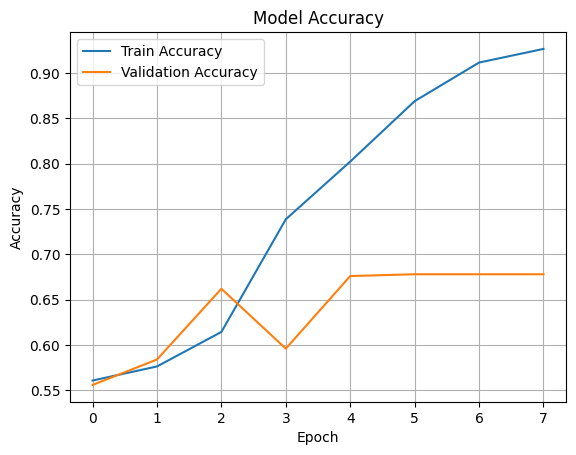

In [99]:
# 13. Visualisasi Akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       373
           1       0.33      0.38      0.35        80
           2       0.54      0.25      0.34       172

    accuracy                           0.64       625
   macro avg       0.53      0.50      0.50       625
weighted avg       0.62      0.64      0.61       625



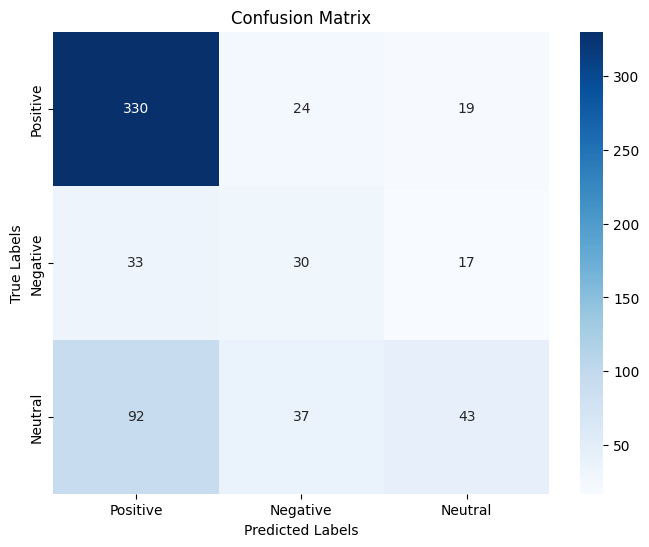

In [100]:
# Melakukan Prediksi pada Data Uji
y_pred_lstm = lstm_model.predict(X_test)
y_pred_lstm = np.argmax(y_pred_lstm, axis=1)

# Menampilkan Classification Report
print("Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), y_pred_lstm))

# Menampilkan Confusion Matrix (Matriks Kebingungan)
conf_matrix_lstm = confusion_matrix(y_test.argmax(axis=1), y_pred_lstm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lstm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Positive', 'Negative', 'Neutral'],
            yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



# Model 3 - GRU

In [67]:
from keras.models import Sequential
from keras.layers import GRU, Embedding, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [68]:
X = clean_data['text_final']
y = clean_data['polarity']

In [69]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
max_length = 100
X_pad = pad_sequences(X_seq, maxlen=max_length)


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

y_encoded = to_categorical(y_encoded, num_classes=3)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_encoded, test_size=0.2, random_state=42)


In [71]:
# Membangun Model LSTM
gru_model = Sequential([
    Embedding(input_dim=5000, output_dim=128),
    GRU(128, return_sequences=True),
    Dropout(0.4),
    GRU(64, return_sequences=True),
    Dropout(0.4),
    GRU(32),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(3, activation='softmax')
])


# Menyusun (Compile) Model
optimizer = Adam(learning_rate=0.001)
gru_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [73]:
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_encoded, test_size=0.2, random_state=42)

In [74]:
# Membuat Model GRU
gru_model = Sequential([
    Embedding(input_dim=5000, output_dim=128),
    GRU(128, return_sequences=True),
    Dropout(0.4),
    GRU(64, return_sequences=True),
    Dropout(0.4),
    GRU(32),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(3, activation='softmax')
])

# Compile Model
initial_learning_rate = 0.001
optimizer = Adam(learning_rate=initial_learning_rate)
gru_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [75]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-6
)
history = gru_model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 316ms/step - accuracy: 0.5563 - loss: 0.9940 - val_accuracy: 0.5980 - val_loss: 0.8359 - learning_rate: 0.0010
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 275ms/step - accuracy: 0.6611 - loss: 0.7289 - val_accuracy: 0.6840 - val_loss: 0.7341 - learning_rate: 0.0010
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 292ms/step - accuracy: 0.8322 - loss: 0.4228 - val_accuracy: 0.7060 - val_loss: 0.7640 - learning_rate: 0.0010
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 318ms/step - accuracy: 0.9376 - loss: 0.2107 - val_accuracy: 0.7220 - val_loss: 1.0654 - learning_rate: 0.0010
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.9679 - loss: 0.1217
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 280ms/step - accuracy: 0.9678 - loss: 0.1218 - val_accuracy: 0.6940 - val_loss: 1.1456 - learning_rate: 0.0010
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 303ms/step - accuracy: 0.9729 - loss: 0.10

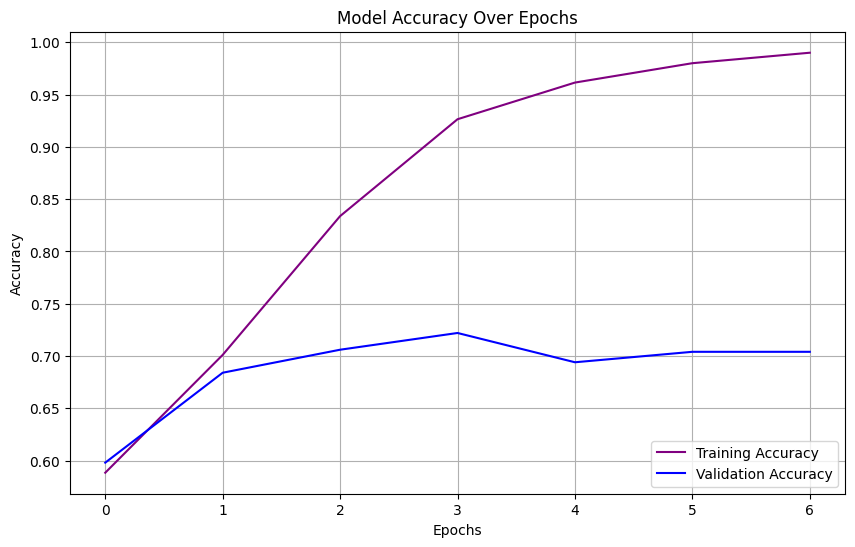

In [76]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='purple')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(visible=True)
plt.show()



In [78]:
# Eval data Training
train_loss_gru, train_accuracy_gru = gru_model.evaluate(X_train, y_train)
print(f"Train Accuracy: {train_accuracy_gru * 100:.2f}%")

# Eval data Testing
test_loss_gru, test_accuracy_gru = gru_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy_gru * 100:.2f}%")


79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.8112 - loss: 0.4676
Train Accuracy: 79.94%
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.7047 - loss: 0.6860
Test Accuracy: 70.24%


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       373
           1       0.33      0.19      0.24        80
           2       0.60      0.62      0.61       172

    accuracy                           0.70       625
   macro avg       0.57      0.55      0.56       625
weighted avg       0.68      0.70      0.69       625



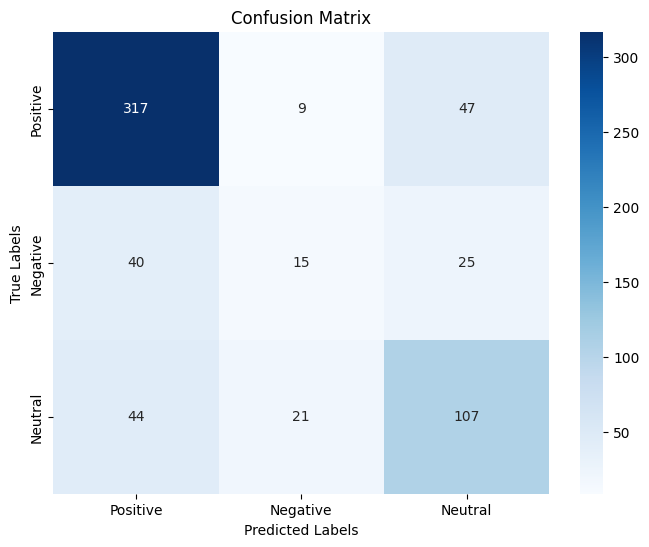

In [79]:
# Melakukan Prediksi pada Data Uji
y_pred_gru = gru_model.predict(X_test)
y_pred_gru = np.argmax(y_pred_gru, axis=1)

# Menampilkan Classification Report
print("Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), y_pred_gru))

# Menampilkan Confusion Matrix (Matriks Kebingungan)
conf_matrix_lstm = confusion_matrix(y_test.argmax(axis=1), y_pred_gru)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lstm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Positive', 'Negative', 'Neutral'],
            yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Final Evaluation

In [102]:
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'LSTM', 'GRU'],
    'Train Accuracy': [accuracy_train_lr, train_accuracy_lstm, train_accuracy_gru],
    'Test Accuracy': [accuracy_test_lr, test_accuracy_lstnm, test_accuracy_gru]
  })

print(results_df)

                 Model  Train Accuracy  Test Accuracy
0  Logistic Regression        0.922258       0.820608
1                 LSTM        0.719263       0.644800
2                  GRU        0.799359       0.702400


In [106]:
# Input Kalimat Baru
new_sentence = input("Enter a new sentence: ")

# Preprocessing Kalimat
new_sentence_cleaned = cleaningText(new_sentence)
new_sentence_casefolded = casefoldingText(new_sentence_cleaned)
new_sentence_slangfixed = fix_slangwords(new_sentence_casefolded)
new_sentence_tokenized = tokenizingText(new_sentence_slangfixed)
new_sentence_filtered = filteringText(new_sentence_tokenized)
new_sentence_final = toSentence(new_sentence_filtered)

# Tokenisasi & Padding
new_sentence_sequence = tokenizer.texts_to_sequences([new_sentence_final])
new_sentence_padded = pad_sequences(new_sentence_sequence, maxlen=max_length)


# Prediksi Sentimen dengan Model GRU
predicted_sentiment = gru_model.predict(new_sentence_padded)


# Interpretasi Hasil
sentiment_label = np.argmax(predicted_sentiment, axis=1)

label_map = {0: "NEGATIVE", 1: "NEUTRAL", 2: "POSITIVE"}
predicted_label = label_map[sentiment_label[0]]


# Menampilkan Hasil
print("\nInput Text: ", new_sentence)
print("Predicted Sentiment: ", predicted_label)


Enter a new sentence: Sukses selalu timnas wujud nyata karya anak bangsa
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step

Input Text:  Sukses selalu timnas wujud nyata karya anak bangsa
Predicted Sentiment:  NEGATIVE


# Conclusion
In this project, sentiment analysis was carried out through several stages, including data scraping, data preprocessing, data labeling, feature extraction, and machine learning modeling.

Data scraping was done by collecting comments from 6 YouTube videos about the IKN (Ibu Kota Nusantara). The total dataset consists of approximately 30.000 entries. Three model training schemes were tested as follows:

* Model 1 = Logistic Regression (LR), Feature Extraction: TF-IDF, Data Split: 70:30
* Model 2 = Long Short-Term Memory (LSTM), Data Split: 80:20
* Model 3 = Gated Recurrent Unit (GRU), Data Split: 80:20

The results show that Model 1 (Logistic Regression) achieved a test accuracy of 83%. Models 2 (LSTM) and 3 (GRU) both achieved an accuracy of 87%, outperforming Logistic Regression. However, further optimization of the LSTM and GRU models could potentially improve their performance.